# Exercise3: MNIST Data

I used "Python Machine Learning" book written by "Sebastian Raschka"
"https://www.academia.edu/37250098/Python_Machine_Learning.pdf"
Chapter12, page 351, Topic: "Obtaining the MNIST".


In [64]:
import os
import struct
import numpy as np

The Load_mnist function return two arrays, the fisrt begin an n*m dimensional Numpy array(images), where n is the number of samples and m is the number of features. The training data set consist 60000 training digit and test set contains 10000 samples. 

The second array (labels) returned by the load_mnist function contains the corresponding target variable, the class labels (integers 0-9) of the handwriten digits.

The way we read in the image might seem a little bit strange at first:

magic, n = struct.unpack('>II',lbpath.read(8))
labels = np.fromfile(lbpath,dtype = np.uint8)

To understand these two lines, we first read in magic number, which is a description of the file protocol as well as the number  of items (n) from the file buffer before we read the following bytes into a Numpy array using the fromfile method. The fmt parameter value >II that we passed as an argument to struct.unpack has two parts:

1) (>): This is big-endian which defines the order in which a sequence of the bytes is sorted.
2) (I): This is an unsigned integer.

In [65]:
# load_mnist function returns two arrays first n*m, n = number of samples and  m= number of features
# second array 784 per row, second array (labels) return by the load_mnist function contains the target variable,(integre 0-9)
def load_mnist(path, kind= 'train'):
    """ Load MNIST data from ´path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte'
                             % kind)
    images_path = os.path.join(path,
                              '%s-images-idx3-ubyte'
                              % kind)
# read image 
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype = np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        
        images = np.fromfile(imgpath,
                    dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels  
# we basically load 60000 training instance as well as 10000 test sample from minst directory 

By extracting the following code, we will now load the 60000 training instances as well as the 10000 test samples from the mnist directory where we unzipped the MNIST dataset:

In [60]:
X_train, Y_train = load_mnist('mnist', kind='train')

In [61]:
print('Rows: %d, columns: %d'
     % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [62]:
# Rows: 60000, columns: 784
X_test, y_test = load_mnist('mnist', kind = 't10k')

In [63]:
# Rows: 60000, columns: 784
print('Rows: %d, columns: %d'
     % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


# Plot of the 2*5 subfigures showing a representative image of each unique digit

To get a idea what the images in MNIST look like, let's visualize examples of the digits 0-9 after reshaping the 784 pixel vectors from our feature matrix into the original 28*28 image that we can plot via imshow function:

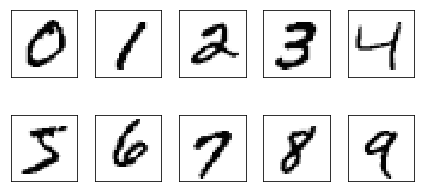

In [49]:
# visualize examples of the digits 0-9 afyter reshaping the 784-pixel vectors
#from our feature matrix into the original 28*28 image that we can plot 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[Y_train ==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation= 'nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

#### Plot multiple example of the same digit to see how different thoes handwriting examples really are:

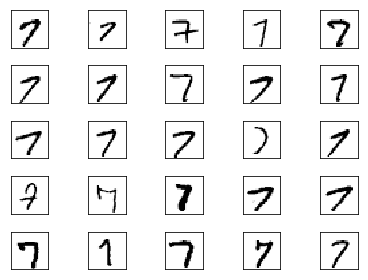

In [57]:
fig, ax = plt.subplots(nrows=5,
                      ncols=5,
                      sharex=True,
                      sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[Y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

we can save the MNIST image data and labels as CSV files. In order to open them in programs that do not support their special byte format.

In [50]:
np.savetxt('train_img.csv', X_train, fmt='%i', delimiter=',')
np.savetxt('train_labels.csv', Y_train, fmt='%i', delimiter=',')
np.savetxt('test_img.csv', X_test, fmt='%i', delimiter=',')
np.savetxt('test_labels.csv', y_test, fmt='%i', delimiter=',')

CSV files, we can load them back into python using Numpy's genfromtxt function:

In [51]:
X_train = np.genfromtxt('train_img.csv',
                       dtype=int, delimiter=',')
y_train = np.genfromtxt('train_labels.csv',
                       dtype=int, delimiter=',')
X_test = np.genfromtxt('test_img.csv',
                       dtype=int, delimiter=',')
y_test = np.genfromtxt('test_labels.csv',
                       dtype=int, delimiter=',')

### My K-NN Classification Implementation used on Exe1 

In [52]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2,axis=0)) 

In [53]:
def knn(xtr,xte,lb,k=1,print_=0):
    
    distance_list = [[euclidean_distance(train_i,test_i) for train_i in xtr] for test_i in  xte]
    distance_list = np.array(distance_list)
       
    sorted_distance_list = np.sort(distance_list, axis=1)
    sorted_index = np.argsort(distance_list, axis=1)
   
    k_nearest_poins = np.take(xtr,sorted_index[:,0:k],axis=0)
    
    k_nearest_label = np.take(lb,sorted_index[:,0:k],axis=0)
        
    distance_k_nearest_points = [sorted_distance_list[:,0:k] ]
    
    predicted = []
    
    for p in k_nearest_label:
        predicted.append(np.bincount(p).argmax())

    predicted = np.array(predicted)
    
    return predicted

### Note: It take around 30 minutes to run :(

In [54]:
knn(X_train,X_test,y_train,k=5,print_=1)

array([7, 2, 1, ..., 4, 5, 6])